$Linear$ $Regerssion$

Thực hiện bởi $Lê$ $Phương$ $Nam$

In [3]:
NAME="Le Phuong Nam"
id="B22DCCN555"

Bài toán dự đoán điểm của học sinh dựa trên dữ liệu có sẵn (Số giờ học)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Sử dụng linear regression đơn biến sử dụng một tính năng duy nhất (hồi quy tuyến tính đơn giản)

x là số giờ nghiên cứu biến đầu vào (biến độc lập)

y là diem cua hs la biến phụ thuộc duy nhất là đầu ra (giá trị cần dự đoán)


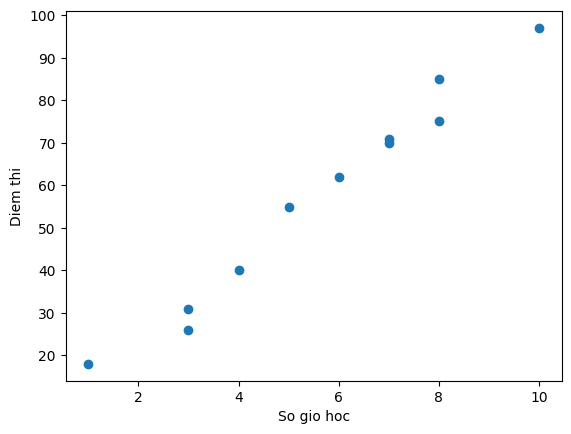

In [5]:
#Independent Variable (Bien dau vao so gio hoc X)
X=np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
#Dependent Variable ( Bien phu thuoc dau ra Y)
Y=np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data 
plt.scatter(X,Y)
plt.xlabel('So gio hoc')
plt.ylabel('Diem thi')
plt.show()

(97, 2)


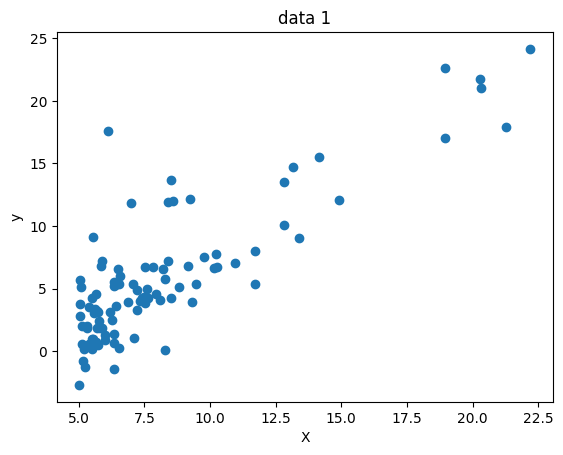

In [6]:
data= np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0, 1))
print(data.shape)

plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('y')
plt.title('data 1')
plt.show()

Giả sử phương trình tuyến tính đơn giản $$y = b_0+b_1 * x$$
$ b_0 là hệ số chặn $

$ b_1  là hệ số góc $


Giả sử x viết dưới dạng ma trận là $X=\begin{bmatrix}
 x_1& x_2& x_3&
 ...
 ...&
 x_n\\
\end{bmatrix}$

Ma trận B chứa $b_0$ và $b_1$ là $B=\begin{bmatrix}
     b_0\\
     b_1\\
\end{bmatrix}$

Ma trận  $Y=\begin{bmatrix}
 y_1\\
 y_2\\
 y_3\\
 ...\\
 ...\\
 y_n\\
\end{bmatrix}$

Với dk: $y_i=b_0+b_1*x_i$ 

Nhận thấy $b_0$ không phụ thuộc $x_i$ với mọi $i <= n$

Viết lại ma trận X
$$X=\begin{bmatrix}
 1& 1& 1& ......& 1\\
 x_1& x_2& x_3&
 ...
 ...&
 x_n\\
\end{bmatrix}$$
 


Ta nhận thấy lúc này: $Y=B^T*X$

Code: xây dựng ma trận X

In [7]:
X_data=np.array([data[:,0]]).T
X_data=np.insert(X_data,0,1,axis=1)
y_data=data[:,1]

In [8]:
print(X_data.shape)
print(y_data.shape)

(97, 2)
(97,)


Đánh giá giả thiết kế ma trận X, xây dựng ma trận Y

In [9]:
def MatricY(X,B):
    y_prec=np.dot(X,B.T)
    return y_prec

In [10]:
B= np.array([0, 10])
#res = MatricY(X,B)
res2 = MatricY(X_data, B)


In [11]:
print("result2", res2)

result2 [ 61.101  55.277  85.186  70.032  58.598  83.829  74.764  85.781  64.862
  50.546  57.107 141.64   57.34   84.084  56.407  53.794  63.654  51.301
  64.296  70.708  61.891 202.7    54.901  63.261  55.649 189.45  128.28
 109.57  131.76  222.03   52.524  65.894  92.482  58.918  82.111  79.334
  80.959  56.063 128.36   63.534  54.069  68.825 117.08   57.737  78.247
  70.931  50.702  58.014 117.     55.416  75.402  53.077  74.239  76.031
  63.328  63.589  62.742  56.397  93.102  94.536  88.254  51.793 212.79
 149.08  189.59   72.182  82.951 102.36   54.994 203.41  101.36   73.345
  60.062  72.259  50.269  65.479  75.386  50.365 102.74   51.077  57.292
  51.884  63.557  97.687  65.159  85.172  91.802  60.02   55.204  50.594
  57.077  76.366  58.707  53.054  82.934 133.94   54.369]


$Cost$ $Function$ ($Hàm$ $Chi$ $Phí$) 

Hàm chi phí $J$ thường được tính bằng trung bình của bình phương sai số ($MSE$) :

$J(B)=\frac{1}{2}\sum_{i=1}^n(y(x_i) -y_i)^2$
     $=\frac{1}{2}(X*B-Y)^T*(X*B-Y)$

Điều chỉnh $b_0$ và $b_1$ để hàm $J$ min (điều chỉnh ma trận $B$)

Hàm tính $J$

In [12]:
def costJ(B,X,Y):
    z = np.dot( X, B)
    dy= z - Y
    J=np.dot(0.5*dy.T,dy)
    return J

In [13]:
J1 = costJ(B,X_data,y_data)
print(J1)


334551.1936199232


Phương pháp làm giảm chi phí hàm J: Sử dụng $Gradient$

Điều chỉnh các giá trị $b_0$ và $b_1$ để tìm đường $fitlane$ tốt nhất

Để tìm mức tối thiểu này, chúng ta sẽ tìm điểm mà tại đó gradient bằng với vectơ không.

Độ dốc của một hàm đa biến tại một điểm cụ thể là một vectơ chỉ theo hướng dốc tối đa với độ lớn biểu thị độ dốc của tiếp tuyến tại điểm đó.

Xét biểu thức $J(B)=\frac{1}{2}\sum_{i=1}^n(y(x_i) -y_i)^2$
     $=\frac{1}{2}(X*B-Y)^T*(X*B-Y)$

Hàm $J$ là hàm lồi 2 biến $b_0$ và $b_1$ vậy có sẽ đạt min khi Gradient (Đạo hàm riêng theo 2 phương $b_0$ và $b_1$ là 0)

Ví dụ và đồ thị 3D minh họa:


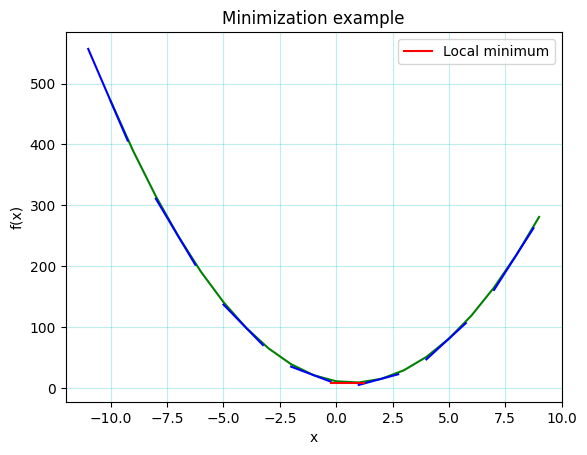

In [14]:
# Define range for plotting x
x = np.arange(-10, 10, 1)

# Example function f(x)
def f(x):
    return 4 * x * x - 6 * x + 11

# Plot f(x)
plt.plot(x, f(x), 'g')

# First derivative of f(x)
def dfx(x):
    return 8 * x - 6

# Plot tangent lines for f(x)
for i in np.arange(-10,10,3):
    x_i = np.arange(i - 1.0, i + 1.0, .25)
    m_i = dfx(i)
    c =  f(i) - m_i*i
    y_i = m_i*(x_i)  +  c
    plt.plot(x_i,y_i,'b')

# Plot tangent line at the minimum of f(x)
minimum = 0.75

for i in [minimum]:
    x_i = np.arange(i - 1, i + 1, .5)
    m_i = dfx(i)
    c = f(i) - m_i * i
    y_i = m_i * (x_i) + c
    plt.plot(x_i, y_i, 'r-', label='Local minimum')

# Decorate the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimization example')
plt.grid(axis='both',color='c', alpha=0.25)
plt.legend();
plt.show()

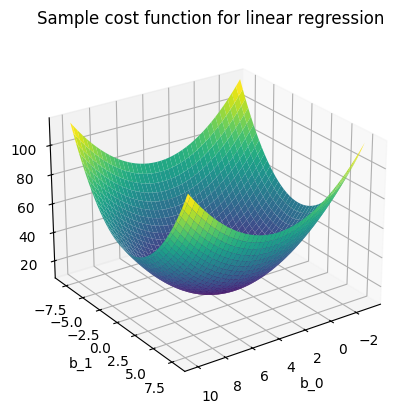

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
x1 = np.linspace(-3.0, 10.0, 80)
x2 = np.linspace(-8.0, 8.0, 85)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.square(X1 - np.mean(X1)) + np.square(X2 - np.mean(X2))) + 10

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlabel('J')
ax.set_xlabel('b_0')
ax.set_ylabel('b_1')
ax.set_title('Sample cost function for linear regression')
cm = plt.get_cmap('viridis')
ax.plot_surface(X1, X2, Y, cmap=cm)
ax.view_init(elev=25, azim=55)
plt.show()

Đạo hàm $J$

$\nabla J(B)= X^T(X*B-Y)$

Code:

In [16]:
def gradient(X,Y,B):
    d=np.dot(X,B)
    dy=d-Y
    J1=np.dot(X.T,dy)
    return J1

In [17]:
res=gradient(X_data,y_data,B)
print(res)


[ 7348.6099     72624.92611208]


Cập nhật lại ma trận B:
$$B=B-\alpha*\nabla J(B)$$ 


Viết hàm update ma trận $B$

In [18]:
def update_B(X,y,B_u,alpha,iters):
    cost = np.zeros(iters)
    gradient_iter = np.zeros((iters,len(B_u)))
    B=B_u
    for i in range(iters):
        #tinh gradient hien tai
        grad=gradient(X,y,B)
        #cap nhat lai ma tran B
        B=B-alpha*grad
        #luu lai chi phi thu i vao mang cost
        cost[i] = costJ(B, X, y)
        #Luu lai gia tri grad lan thu i
        gradient_iter[i] = grad.T
    return (B,cost,gradient_iter)

In [19]:
 B = np.array([0, 10])
(B_update,cost,gradient_iter)=update_B(X_data,y_data,B,0.001,10)
print("B",B_update)
print("cost",cost)
print("gradient_iter",gradient_iter)

B [2.49586699e+08 2.48441765e+09]
cost [1.62549391e+07 7.90946753e+08 3.84877236e+10 1.87282617e+12
 9.11323816e+13 4.43453381e+15 2.15785978e+17 1.05002218e+19
 5.10944492e+20 2.48627391e+22]
gradient_iter [[ 7.34860990e+03  7.26249261e+04]
 [-5.08468779e+04 -5.06651170e+05]
 [ 3.55099975e+05  3.53420425e+06]
 [-2.47666950e+06 -2.46535791e+07]
 [ 1.72768901e+07  1.71975865e+08]
 [-1.20517969e+08 -1.19965161e+09]
 [ 8.40697246e+08  8.36840645e+09]
 [-5.86444912e+09 -5.83754701e+10]
 [ 4.09086221e+10  4.07209608e+11]
 [-2.85366163e+11 -2.84057095e+12]]


$Expect$  $output:$

B_update: [2.49586699e+08 2.48441765e+09]

Cost: [1.62549391e+07 7.90946753e+08 3.84877236e+10 1.87282617e+12
9.11323816e+13 4.43453381e+15 2.15785978e+17 1.05002218e+19
5.10944492e+20 2.48627391e+22]


gradient_iter [[ 7.34860990e+03 7.26249261e+04]

[-5.08468779e+04 -5.06651170e+05]

[ 3.55099975e+05 3.53420425e+06]

[-2.47666950e+06 -2.46535791e+07]

[ 1.72768901e+07 1.71975865e+08]

[-1.20517969e+08 -1.19965161e+09]

[ 8.40697246e+08 8.36840645e+09]

[-5.86444912e+09 -5.83754701e+10]

[ 4.09086221e+10 4.07209608e+11]

[-2.85366163e+11 -2.84057095e+12]]


Tiến hành tối ưu hóa các tham số

In [20]:
#matran he so
B_initial=np.array([0,0])
#toc do hoc alpha
alpha=0.0001
#so lan lap
iters=500000
(B_best,cost,grad)=update_B(X_data,y_data,B_initial,alpha,iters)

In [21]:
#b0 va b1 khi toi uu
print("b0",B_best[0])
print("b1",B_best[1])

b0 -3.895780878311723
b1 1.1930336441895804


Khi đó đường điều chỉnh tốt nhất ta có được (Best fitlane):

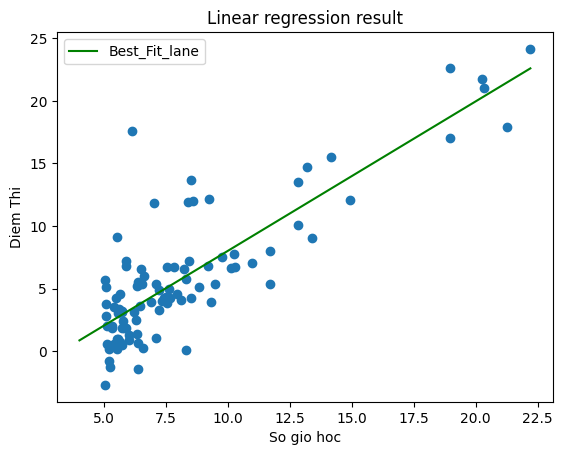

In [22]:
plt.scatter(X_data[:,1], y_data)
x = np.linspace(4, np.max(X_data), 2)
y_predicted = B_best[0] + B_best[1] * x
plt.plot(x, y_predicted, 'g', label='Best_Fit_lane')

plt.xlabel('So gio hoc')
plt.ylabel('Diem Thi')
plt.legend();
plt.title('Linear regression result')
plt.show()

Đồ thị hình dung sự liên quan của hàm J (hàm chi phí) và Iters (Số lần thực hiện lặp)

In [23]:
def cost_plot(iterations, costs):
    # YOUR CODE HERE
    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()

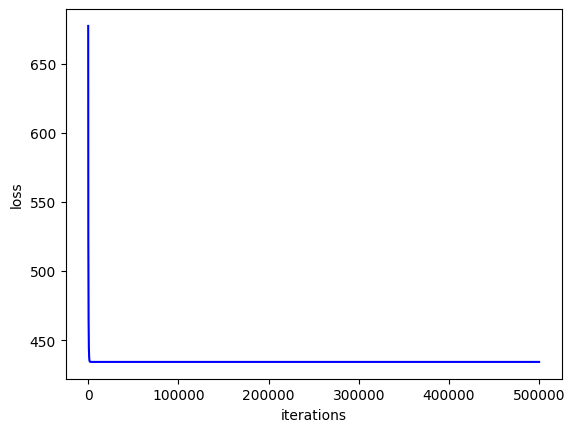

In [24]:
cost_plot(iters,cost)

Thử nghiệm với số lần lặp bé hơn

In [25]:
 iters=500000
(B_best,cost,grad)=update_B(X_data,y_data,B_initial,alpha,iters)

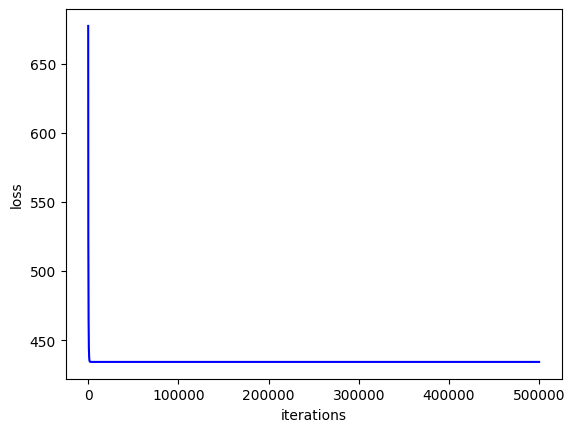

In [26]:
cost_plot(iters,cost)

 Có thể thấy hàm chi phí J đã hội tụ (tổn thất đã ngừng cải thiện)

 Có thể kết luận 5000 lặp là quá mức cần thiết

 Hàm J ổn định sau khoảng 1000 lần lặp hoặc lâu hơn
 

$Goodness$ $of$  $Fit$

Đánh giá mô hình

$R^2$ là một thống kê cho biết mức độ biến đổi mà mô hình đã phát triển có thể giải thích hoặc nắm bắt được. Nó luôn nằm trong khoảng từ 0 đến 1. Nói chung, mô hình càng khớp với dữ liệu thì số R bình phương càng lớn.

Trong ký hiệu toán học, nó có thể được biểu thị như sau:

$$R^2=1-\frac{RSS}{TSS}$$

In [55]:
def goodness_of_fit(y, y_predicted):
    r_square = 1 - ((np.square(y - y_predicted)).sum() / (np.square(y - y.mean())).sum())
    if r_square <0:
        r_square =0
    return r_square

In [56]:
y_predicted = MatricY(X_data, B_best)
r_square = goodness_of_fit(y_data, y_predicted)
print(r_square)

0.7020315537841397


$Multivariate$ $linear$ $regression$

Hồi quy tuyến tính đa biến

Tiếp theo, chúng tôi mở rộng sang nhiều biến. Chúng tôi sẽ sử dụng tập dữ liệu từ lớp của Andrew Ng. Dữ liệu bao gồm các biến độc lập là "Số phòng ngủ"...... và biến phụ thuộc là "Giá".

Bài toán này được lấy tập dữ liệu trên Kaggle:

Link:https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression


In [82]:
housing =pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Để thuận tiện và đơn giản ở đây ta chỉ xét 4 biến độc lập để xét biến phụ thuộc đầu ra là:

"area" : Diện tích

"bedrooms": Số phòng ngủ

"bathrooms": Số phòng tắm

"stories" : Câu chuyện về ngôi nhà

Biến đầu ra (Y):

"price": Giá

Trực quan hóa dữ liệu các biến độc lập với Y


['area', 'bedrooms', 'bathrooms', 'stories']


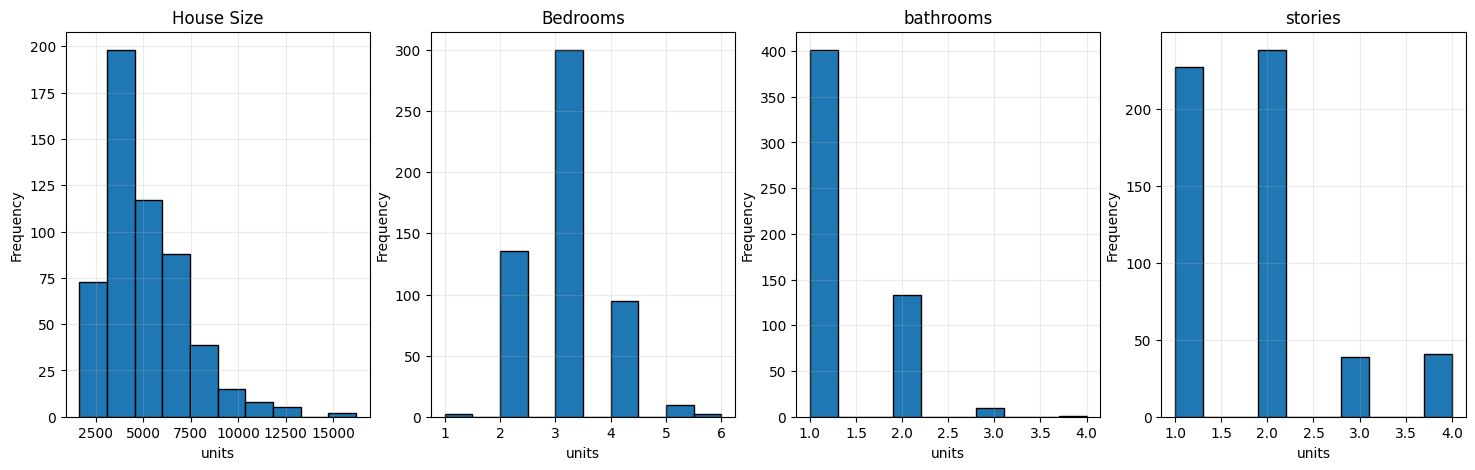

In [225]:
X1_data=['area','bedrooms','bathrooms','stories']
print(X1_data)
fig, ax = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,4,1)
plt2 = plt.subplot(1,4,2)
plt3 = plt.subplot(1,4,3)
plt4 =plt.subplot(1,4,4)
    
plt1.hist(housing['area'], label='Sq. feet', edgecolor='black')
plt1.set_title('House Size')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(housing['bedrooms'], label='Bedroom', edgecolor='black')
plt2.set_title('Bedrooms')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(housing['bathrooms'], label='bathrooms', edgecolor='black')
plt3.set_title('bathrooms')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

plt4.hist(housing['stories'], label='stories', edgecolor='black')
plt4.set_title('stories')
plt4.set_xlabel('units')
plt4.set_ylabel('Frequency')
plt4.grid(axis='both', alpha=.25)

Tiêu chuẩn hóa

Từ biểu đồ trên chúng ta có thể thấy rằng các biến độc lập và biến phụ thuộc có sự khác biệt rất lớn trong phạm vi của chúng. Nếu bạn cố gắng sử dụng trực tiếp phương pháp giảm độ dốc trên những dữ liệu này, bạn sẽ gặp khó khăn lớn trong việc tìm tốc độ học đủ nhỏ để chi phí không tăng ngoài tầm kiểm soát nhưng đủ lớn để số lần lặp không quá mức.

Tiêu chuẩn hóa có thể giúp với điều này. Đối với mỗi biến, chúng tôi trừ giá trị trung bình của biến đó khỏi mọi trường hợp, sau đó chia kết quả cho độ lệch chuẩn của biến. Kết quả sẽ là một tập hợp các biến "chuẩn hóa" với giá trị trung bình 0 và phương sai 1.

In [222]:
#tạo một data để chứa các biến đang xét
X1_data=np.array(housing[['price','area','bedrooms','bathrooms','stories']],dtype=float);
data=X1_data
print(X1_data)

[[1.330e+07 7.420e+03 4.000e+00 2.000e+00 3.000e+00]
 [1.225e+07 8.960e+03 4.000e+00 4.000e+00 4.000e+00]
 [1.225e+07 9.960e+03 3.000e+00 2.000e+00 2.000e+00]
 ...
 [1.750e+06 3.620e+03 2.000e+00 1.000e+00 1.000e+00]
 [1.750e+06 2.910e+03 3.000e+00 1.000e+00 1.000e+00]
 [1.750e+06 3.850e+03 3.000e+00 1.000e+00 2.000e+00]]


In [202]:
#Chuẩn hóa dữ liệu
means= np.mean(data,axis=0)
ssts=np.std(data,axis=0)
data_norm=(data-means)/ssts

In [203]:
print(data_norm)

[[ 4.56636513  1.04672629  1.40341936  1.42181174  1.37821692]
 [ 4.00448405  1.75700953  1.40341936  5.40580863  2.53202371]
 [ 4.00448405  2.21823241  0.04727831  1.42181174  0.22441013]
 ...
 [-1.61432675 -0.70592066 -1.30886273 -0.57018671 -0.92939666]
 [-1.61432675 -1.03338891  0.04727831 -0.57018671 -0.92939666]
 [-1.61432675 -0.5998394   0.04727831 -0.57018671  0.22441013]]


In [194]:
y1_data=np.array([data_norm[:,0]],dtype=float).T
X2_data=np.array(data_norm[:,1:],dtype=float)
print(y1_data)
print(X2_data)
#Chen so 1 cho ma tran X

[[ 4.56636513e+00]
 [ 4.00448405e+00]
 [ 4.00448405e+00]
 [ 3.98575468e+00]
 [ 3.55497918e+00]
 [ 3.25530927e+00]
 [ 2.88072189e+00]
 [ 2.88072189e+00]
 [ 2.73088693e+00]
 [ 2.69342819e+00]
 [ 2.69342819e+00]
 [ 2.62974834e+00]
 [ 2.43121702e+00]
 [ 2.39375829e+00]
 [ 2.39375829e+00]
 [ 2.31884081e+00]
 [ 2.31884081e+00]
 [ 2.24392333e+00]
 [ 2.20646459e+00]
 [ 2.18773522e+00]
 [ 2.13154711e+00]
 [ 2.09408838e+00]
 [ 2.07535901e+00]
 [ 2.07535901e+00]
 [ 2.03790027e+00]
 [ 2.01917090e+00]
 [ 1.97796629e+00]
 [ 1.94425342e+00]
 [ 1.94425342e+00]
 [ 1.94425342e+00]
 [ 1.94425342e+00]
 [ 1.94425342e+00]
 [ 1.88806531e+00]
 [ 1.83187721e+00]
 [ 1.79441847e+00]
 [ 1.77351649e+00]
 [ 1.75321385e+00]
 [ 1.71950099e+00]
 [ 1.71013630e+00]
 [ 1.68204225e+00]
 [ 1.66331288e+00]
 [ 1.64458351e+00]
 [ 1.56966604e+00]
 [ 1.56966604e+00]
 [ 1.49474856e+00]
 [ 1.49474856e+00]
 [ 1.47601919e+00]
 [ 1.45728982e+00]
 [ 1.43856045e+00]
 [ 1.41983108e+00]
 [ 1.41983108e+00]
 [ 1.41983108e+00]
 [ 1.3823723

In [195]:
#Chen so 1 cho ma tran X
X2_data=np.insert(X2_data,0,1,axis=1)
print(X2_data)

[[ 1.          1.04672629  1.40341936  1.42181174  1.37821692]
 [ 1.          1.75700953  1.40341936  5.40580863  2.53202371]
 [ 1.          2.21823241  0.04727831  1.42181174  0.22441013]
 ...
 [ 1.         -0.70592066 -1.30886273 -0.57018671 -0.92939666]
 [ 1.         -1.03338891  0.04727831 -0.57018671 -0.92939666]
 [ 1.         -0.5998394   0.04727831 -0.57018671  0.22441013]]


Sử dụng hàm gradient

In [236]:
B_ini = np.zeros((X2_data.shape[1],1))
alpha = 0.0001
iters = 1000
B, cost1, grad= update_B(X2_data,y1_data,B_ini,alpha,iters)

C:\Users\namle\AppData\Local\Temp\ipykernel_21416\101030148.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = costJ(B, X, y)


In [237]:
print("B",B)

B [[3.33288952e-16]
 [4.40915920e-01]
 [7.82461709e-02]
 [3.22413093e-01]
 [2.46548811e-01]]


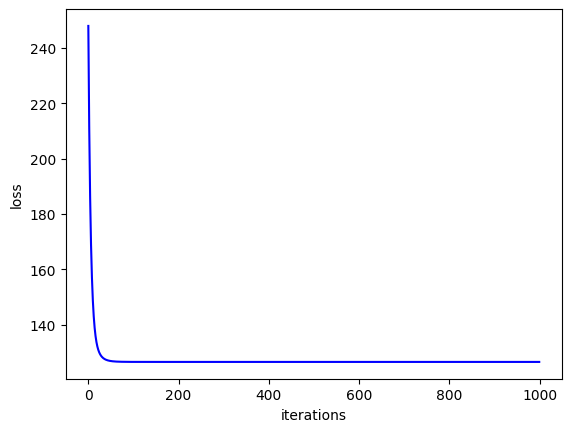

In [238]:
cost_plot(iters, cost1)


Giờ chúng ta sẽ chuyển tỉ lệ đã chuẩn hóa trở về tỉ lệ ban đầu hoàn tác việc chuyển hóa 

In [239]:
#Goodness of fit
y_predicted = np.dot(X2_data,B)
r_square = goodness_of_fit(y1_data, y_predicted)

In [240]:
print(r_square)

0.5355960442835979


Kết quả này cho thấy với chỉ những biến này thì tỉ lệ dữ đoán không được tốt và chính xác

In [241]:
sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))

# De-normalize y

y_predicted = np.array(np.round(MatricY(X2_data, B.T) * sigma[0] + mu[0]))

# Print first five values of y_predicted

print(y_predicted[0:,:])

[[ 7326018.]
 [10843212.]
 [ 7561389.]
 [ 6824825.]
 [ 5594242.]
 [ 7295115.]
 [ 9498622.]
 [11529513.]
 [ 5852659.]
 [ 7024677.]
 [ 7592488.]
 [ 7454969.]
 [ 6463802.]
 [ 5304727.]
 [ 6740537.]
 [ 5054608.]
 [ 6482803.]
 [ 8069744.]
 [ 5524459.]
 [ 6216103.]
 [ 4217871.]
 [ 5963826.]
 [ 5103767.]
 [ 5509258.]
 [ 7120561.]
 [ 6460001.]
 [ 7119683.]
 [ 5417287.]
 [ 7194131.]
 [ 6064776.]
 [ 7680219.]
 [ 6299527.]
 [ 5829161.]
 [ 7241472.]
 [ 5572124.]
 [ 7499707.]
 [ 7151284.]
 [ 8458052.]
 [ 5919502.]
 [ 7317978.]
 [ 5065326.]
 [ 7256492.]
 [ 7302094.]
 [ 7317978.]
 [ 7317978.]
 [ 6588088.]
 [ 7119683.]
 [ 6147517.]
 [ 5410451.]
 [ 6072133.]
 [ 7666918.]
 [ 6043010.]
 [ 7317978.]
 [ 6796662.]
 [ 6056493.]
 [ 4856312.]
 [ 7121941.]
 [ 8458052.]
 [ 7956419.]
 [ 7119683.]
 [ 6056493.]
 [ 5220892.]
 [ 6345994.]
 [ 6923192.]
 [ 6291344.]
 [ 7150963.]
 [ 6862598.]
 [ 6170939.]
 [ 4324717.]
 [ 8569137.]
 [ 5296444.]
 [ 7317978.]
 [ 5547078.]
 [ 7149402.]
 [ 4111464.]
 [ 5593546.]
 [ 6747698.]